<a href="https://colab.research.google.com/github/Aditi840/Guvi-Tasks/blob/main/Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [6]:
df1 = pd.read_csv("/content/college_1.csv")
df2 = pd.read_csv("/content/college_2.csv")
df = pd.concat([df1,df2])
print(df)
print(df.columns)

             Name  python  mysql  Previous Geekions  CodeKata Score  \
0       A.Dharani    82.0   20.0              24500           24500   
1     V.JEEVITHA     82.0   20.0              21740           21740   
2     HEMAVATHI.R   100.0  100.0              19680           19680   
3     Mugunthan S   100.0   47.0              10610           10610   
4     Sathammai.S   100.0    8.0               8980            8980   
..            ...     ...    ...                ...             ...   
30  praveen raj j    24.0    0.0               2380            2380   
31     AMARNATH D    -1.0   12.0               1890            1890   
32           bala    32.0    0.0               1720            1720   
33           XY Z    -1.0   -1.0                  0               0   
34      Hariharan    -1.0   -1.0                  0               0   

                                   Department  Rising  python_en  \
0            Computer Science and Engineering       0        NaN   
1          

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [8]:
exceeded_expectations = df[df['CodeKata Score'] > 15000]
reached_expetations = df[(df['CodeKata Score'] > 10000) & (df['CodeKata Score'] <= 15000)]
needs_improvement = df[(df['CodeKata Score'] > 7000) & (df['CodeKata Score'] <= 10000)]
unsatisfactory = df[df['CodeKata Score'] <= 7000]

In [9]:
exceeded_expectations.to_csv('Exceeded_expectations.csv', index=False)
reached_expetations.to_csv('Reached_expectations.csv', index=False)
needs_improvement.to_csv('Needs_Improvement.csv', index=False)
unsatisfactory.to_csv('Unsatisfactory.csv', index=False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [10]:
previous_geekcoins = df['Previous Geekions'].mean()
this_week_geekcoins = df['CodeKata Score'].mean()
print(previous_geekcoins)
print(this_week_geekcoins)

3842.3529411764707
4051.764705882353


###### No of students participated 

In [11]:
num_participants = len(df)
print(num_participants)

119


###### #Average completion of python course or my_sql or python english or computational thinking

In [12]:
python_avg = df['python'].mean()
mysql_avg = df['mysql'].mean()
python_en_avg = df['python_en'].mean()
computational_thinking_avg = df['computational_thinking'].mean()
print(python_avg)
print(mysql_avg)
print(python_en_avg)
print(computational_thinking_avg)

54.35294117647059
23.5
29.65714285714286
2.2


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [13]:
df['Score Diff'] = df['CodeKata Score'] - df['Previous Geekions']
top_performers = df.sort_values('Score Diff', ascending=False).head(3)
print('Rising stars of the week (based on difference in CodeKata score):')
print(top_performers['Name'])

Rising stars of the week (based on difference in CodeKata score):
8              shifak N
18       Narasimhan Y L
2     Ganesh Ramkumar R
Name: Name, dtype: object


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [14]:
top_performers = df.sort_values('CodeKata Score', ascending=False).head(3)
print('Shining stars of the week (based on CodeKata score):')
print(top_performers['Name'])

Shining stars of the week (based on CodeKata score):
0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object


###### Department wise codekata performence (pie chart)

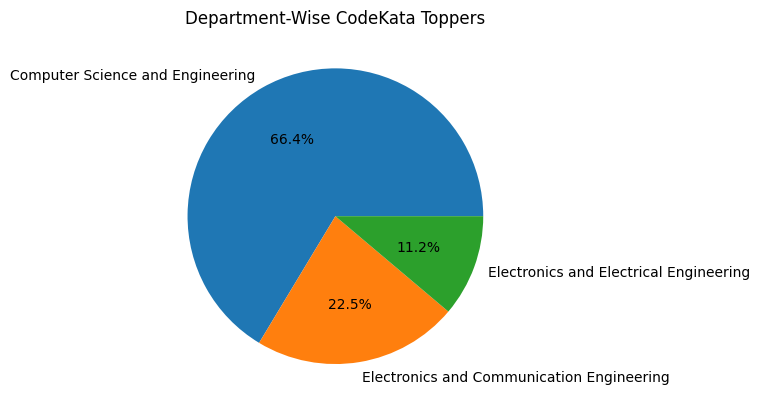

In [16]:
dept_scores = df.groupby('Department')['CodeKata Score'].sum()
plt.pie(dept_scores.values, labels=dept_scores.index, autopct = '%1.1f%%')
plt.title('Department-Wise CodeKata Toppers')
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

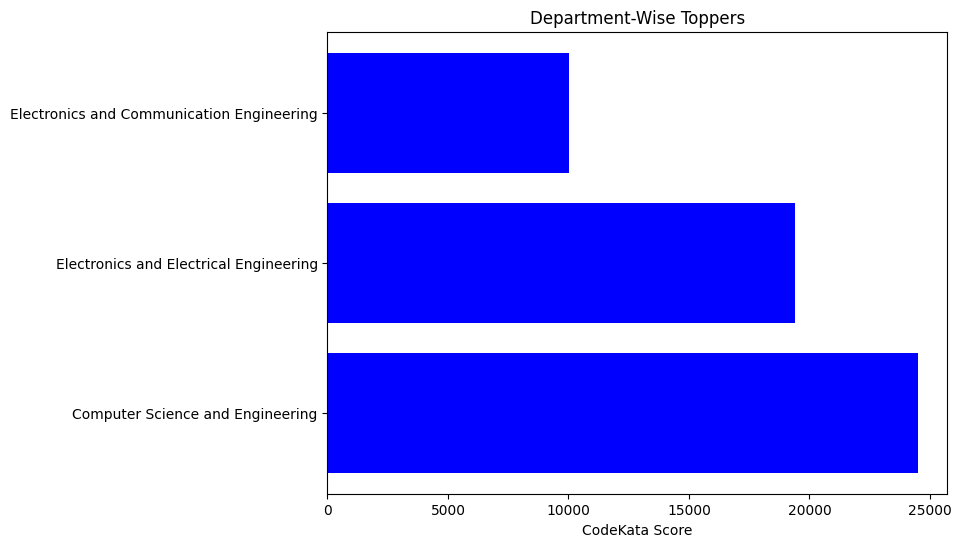

In [19]:
max_scores = df.groupby('Department')['CodeKata Score'].max()
sorted_departments = max_scores.sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(sorted_departments, max_scores[sorted_departments], color='blue')
ax.set_xlabel('CodeKata Score')
ax.set_title('Department-Wise Toppers')
plt.show()